In [ ]:
#Import packages
import os
import numpy as np
import sys

import FFT_processing as fft

In [42]:
#Global variables

pi = np.pi
total_pixels = 256
min_d = 0.1 #minimum interplanar distance computed in the diffraction

res=True
res_value = 1 #angstroms, like probe corrected TITAN in STEM HAADF (in ZGZ), for instance

#define either the total field of view or the pixel size
fov = 2 #nm
pixel_size=  0.03 #nm

#to always choose the first spot but allow in plane rotations
angle_mainrefl_to_x = 0

#material
cells = os.listdir('Cells')
cell = cells[3]

#Zone axis
eje = [1,0,0]

#scale visualization
scale = 3

# Generate Noise

## Simulate FFT and image

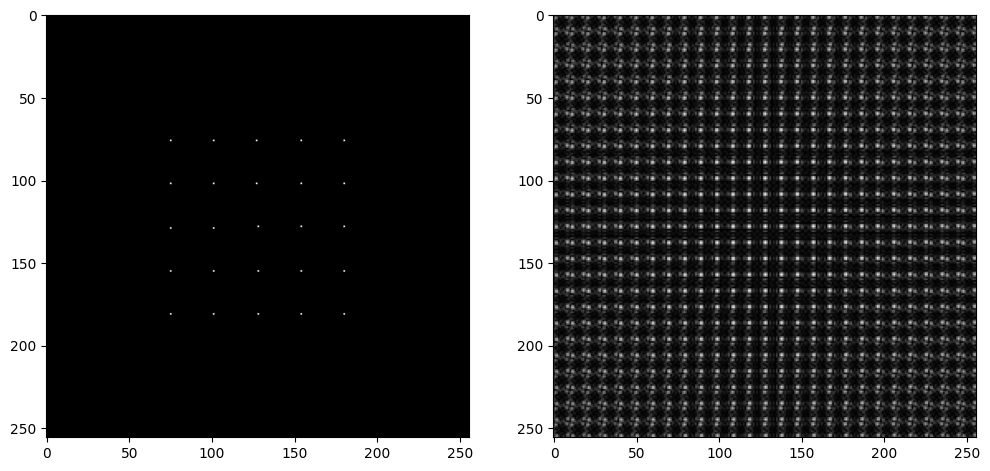

In [ ]:
%matplotlib inline

distances_angles_Fs = fft.distances_angles(cell,eje,min_d,res,res_value)
fft_image, real_image = fft.fft_and_crystal_images(distances_angles_Fs,pixel_size, total_pixels,angle_mainrefl_to_x)
fft_image[total_pixels//2][total_pixels//2] = 1

# ii.multiplot(fft_image, real_image)

## Generate drift

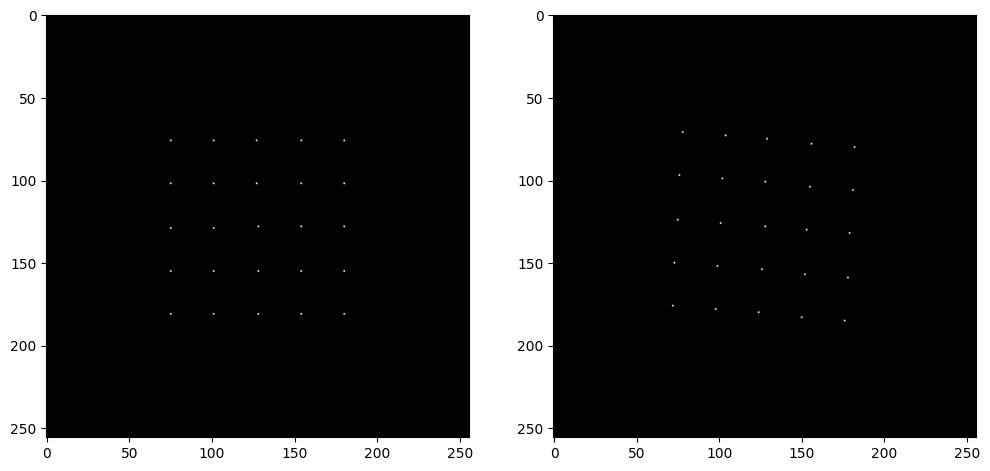

In [ ]:
s = 0.03
t = 5

drift_matrix = fft.drift(s,np.radians(t),fft_image)
# ii.multiplot(fft_image, drift_matrix)


## Generate gaussian atoms

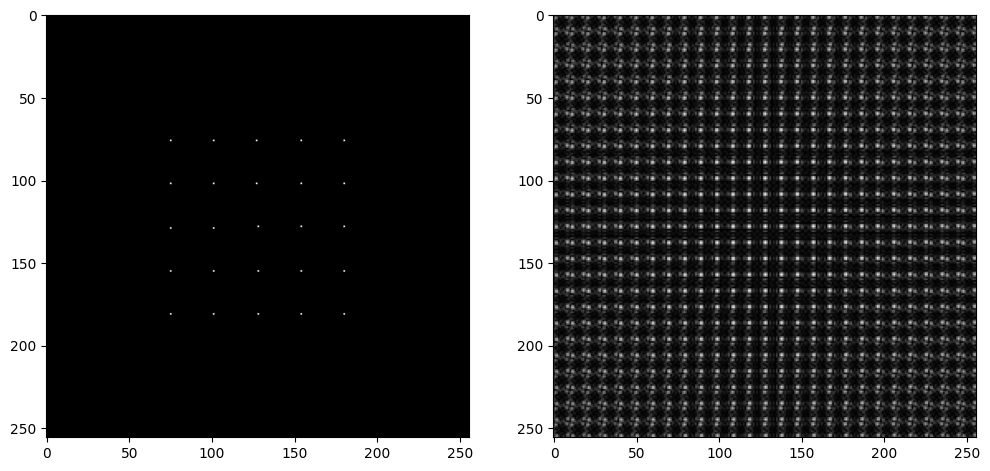

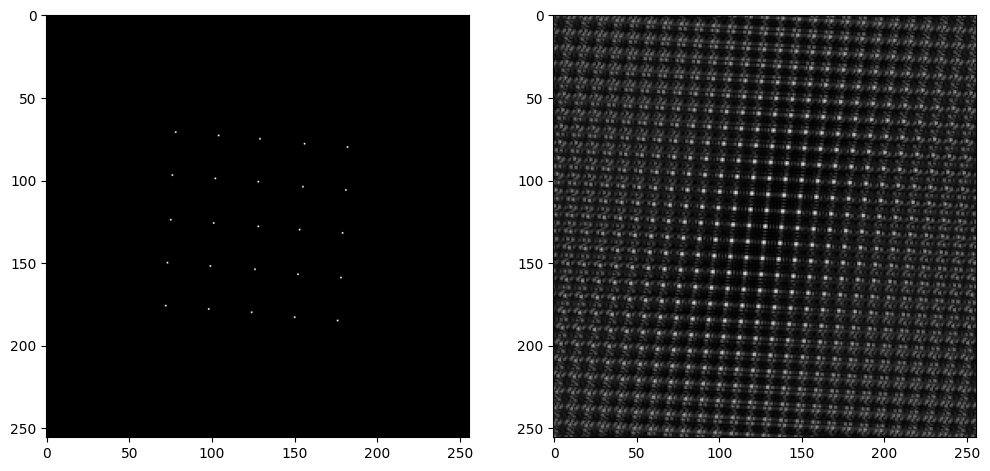

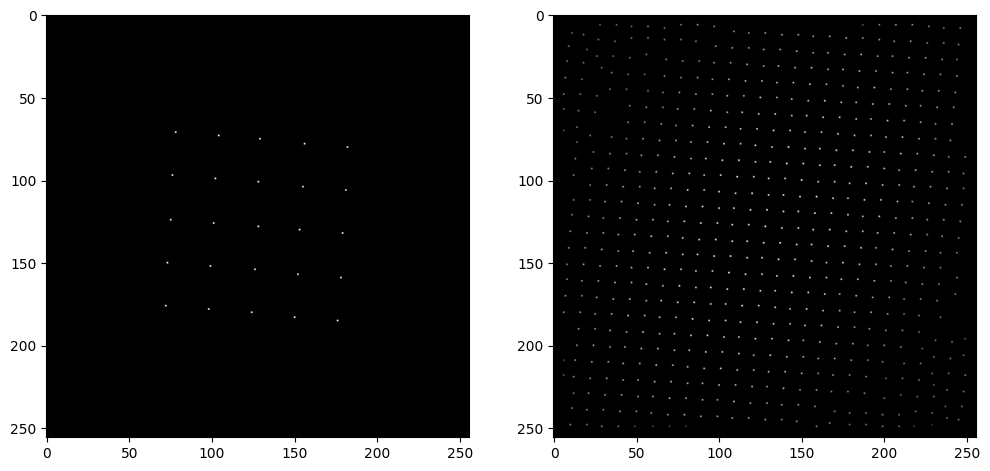

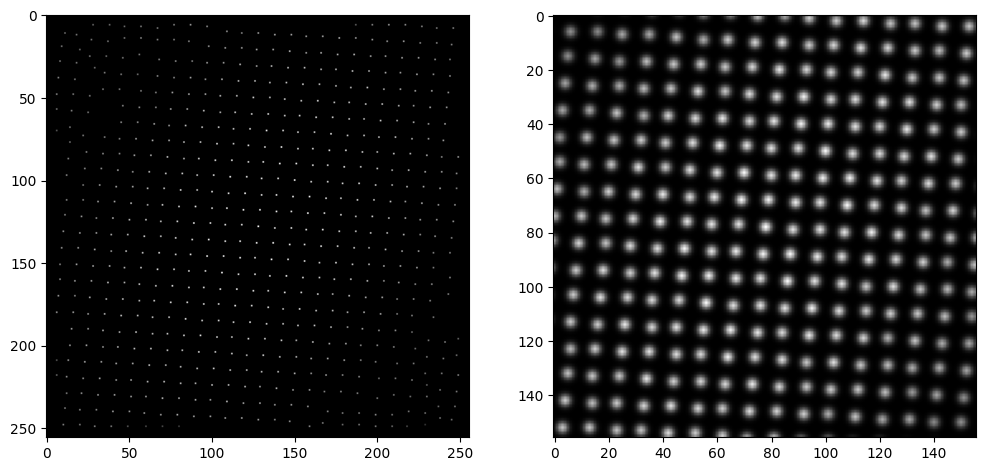

In [ ]:
resolution = 6
sigma = 1.5

# Come back real image
real_image_ = np.fft.fftshift(np.fft.ifft2(drift_matrix))
real_image_normalized = ii.normalize_image(np.abs(real_image_))

# Filter real image (MAYBE IMPROVMENT FOLLOW ORIGINAL CODE)
real_image_treshold, real_image_noise = fft.find_picks2(0,resolution,real_image_normalized)

# Gaussian atoms
gaussian_matrix, index = fft.puntual_to_gaussian(sigma, real_image_treshold)


# ii.multiplot(fft_image, real_image)
# ii.multiplot(drift_matrix, real_image_normalized)
# ii.multiplot(drift_matrix, real_image_treshold)
# ii.multiplot(real_image_treshold, gaussian_matrix[50:-50, 50:-50])

## Apply noise filtters

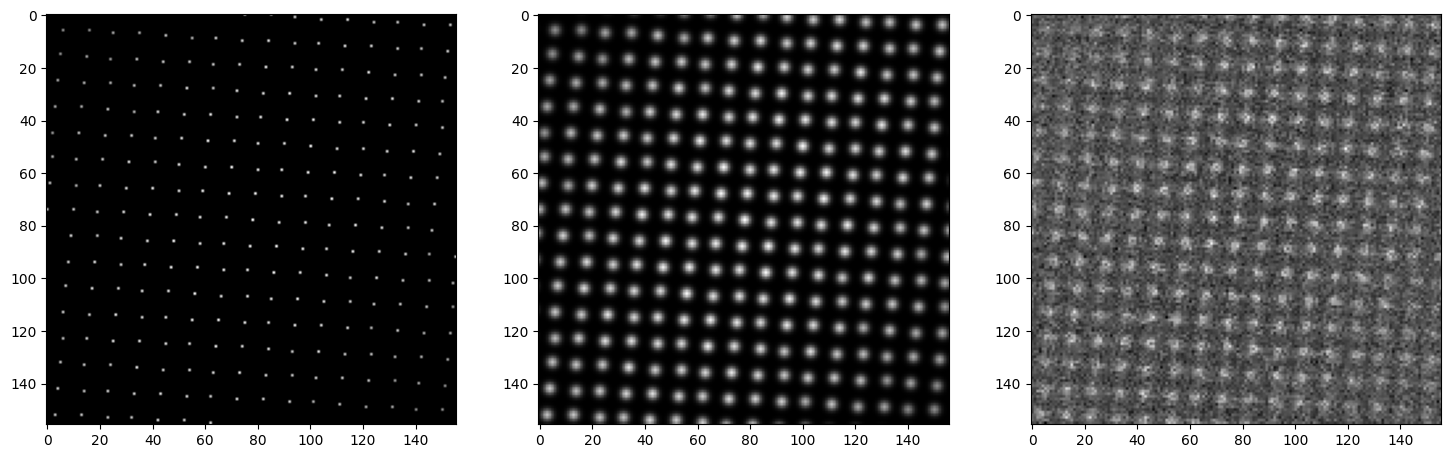

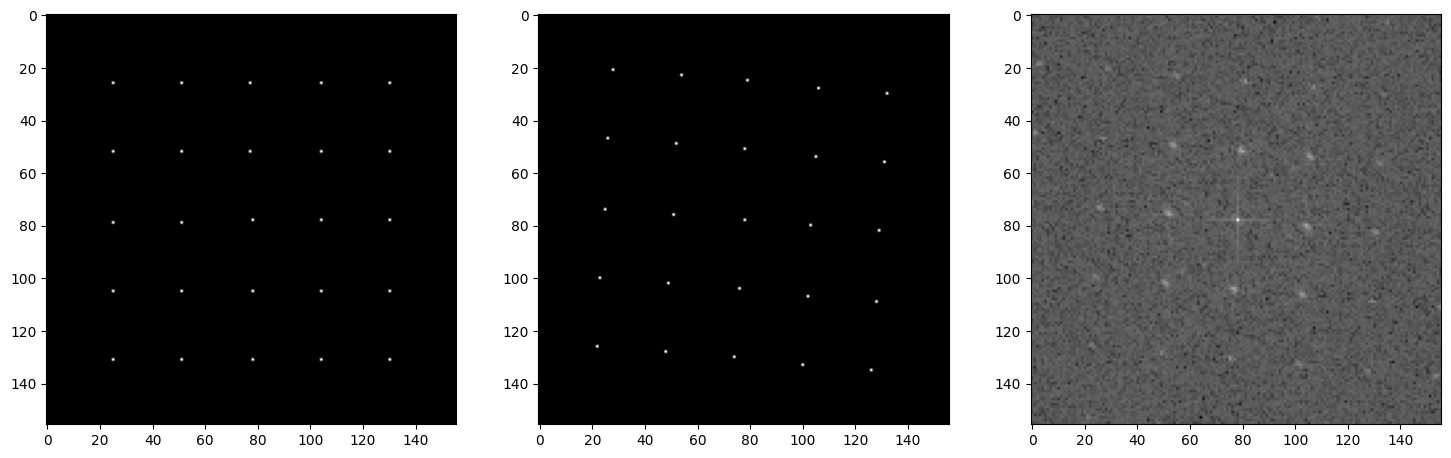

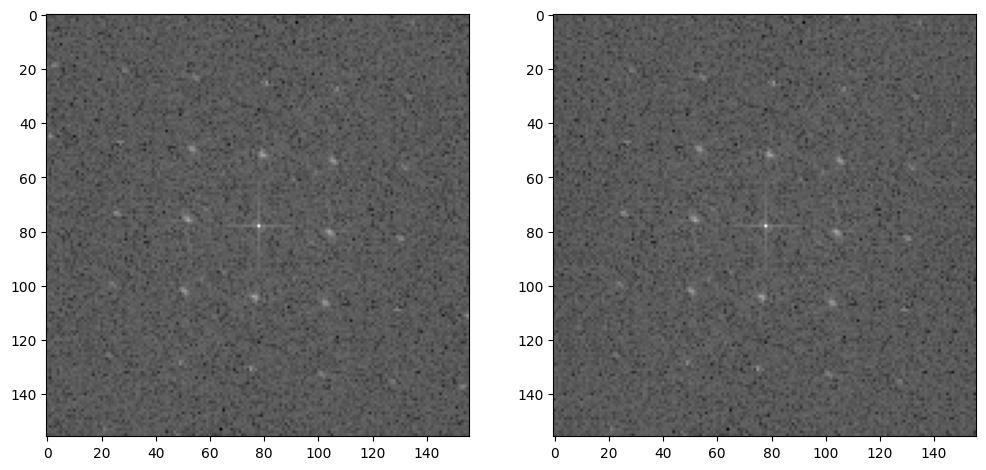

In [ ]:
lamda = 3000
hd = 1
vd = 1
intensity = 200

poisson_matrix = np.random.poisson(lamda, size=(total_pixels, total_pixels))/255#*(1+1j)
total_matrix = gaussian_matrix
distorsion_matrix = fft.points_distorsion(hd, vd, index, sigma, total_matrix)
final_matrix = distorsion_matrix[-1] + real_image_noise + poisson_matrix

# ii.multiplot(real_image_treshold[50:-50, 50:-50], gaussian_matrix[50:-50, 50:-50], final_matrix[50:-50, 50:-50])

fft_noisy = np.log(np.abs(np.fft.fftshift(np.fft.ifft2(final_matrix))))

# filtro_gaussiano = np.zeros((total_pixels, total_pixels))
# filtro_gaussiano[total_pixels//2][total_pixels//2] = 1
# fft_noisy_c = fft.puntual_to_gaussian(intensity, filtro_gaussiano)[0]
# fft_noisy_c = fft_noisy_c * fft_noisy

# ii.multiplot(fft_noisy, fft_noisy_c)
# ii.multiplot(fft_noisy[40:-40, 40:-40], fft_noisy_c[40:-40, 40:-40])

# ii.multiplot(drift_matrix, fft_noisy)
fft_noisy_2 =fft_noisy[50:-50, 50:-50].copy()
fft_noisy_2[:, 0:10] = fft_noisy_2[:, 10:20]*1.01
fft_noisy_2[:, -10:] = fft_noisy_2[:, -20:-10]*1.01
ii.multiplot(fft_image[50:-50, 50:-50], drift_matrix[50:-50, 50:-50], fft_noisy[50:-50, 50:-50])
ii.multiplot(fft_noisy[50:-50, 50:-50], fft_noisy_2)

## Final fft

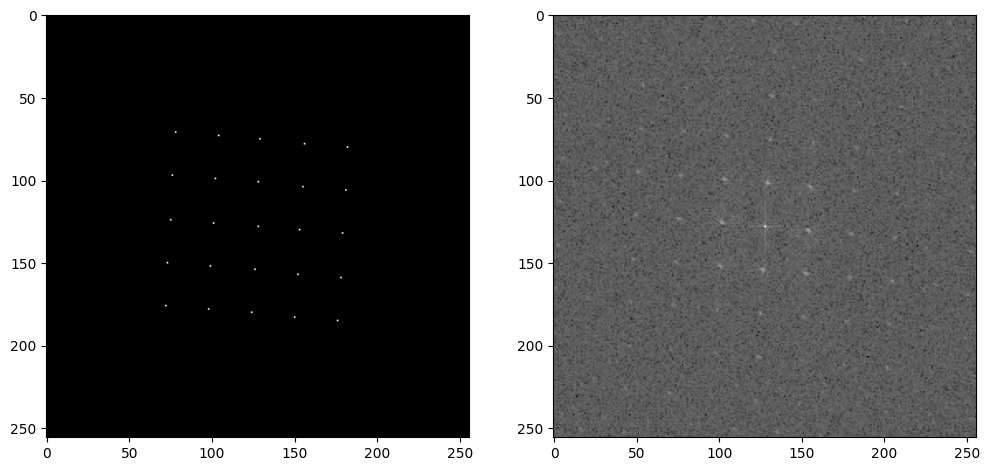

In [ ]:
fft_noisy = np.log(np.abs(np.fft.fftshift(np.fft.ifft2(final_matrix))))

# ii.multiplot(drift_matrix, fft_noisy)

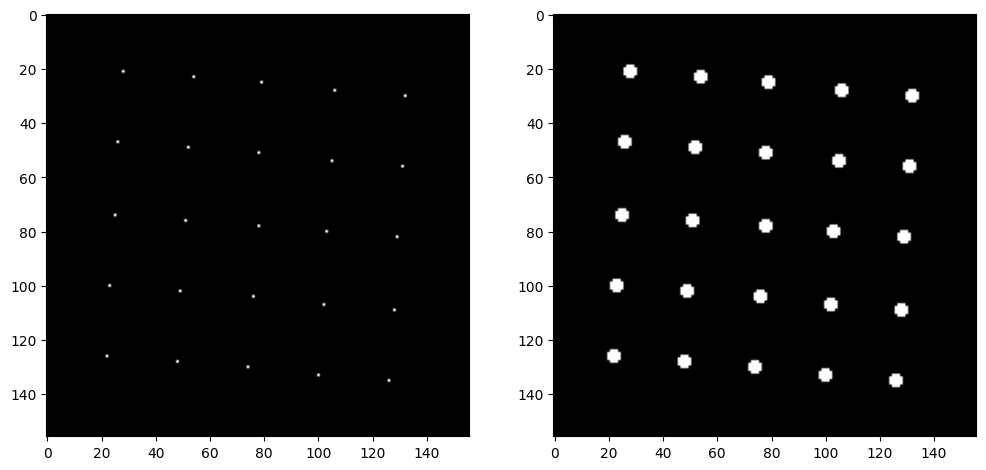

In [ ]:
def cercles(sigma,matrix):
   
    index = np.where(matrix > 0)
    total_pixels = len(matrix)
    image = np.zeros((total_pixels,total_pixels))
    
    if sigma == 0:
        image = matrix
        
    else:
        
        m = np.zeros((total_pixels,total_pixels))
        s = 2*sigma*sigma
        mux = index[0]
        muy = index[1]

   
        mj = np.arange(total_pixels) 
        mj = np.asarray([mj]*total_pixels)
        mi = mj.T  
    
        for k in range(len(mux)): 
            m = m + np.exp(-((mi-mux[k])**2+(mj-muy[k])**2)/s) * matrix[mux[k],muy[k]]
            
        index = np.where(m>0.038)
        image[index] = 1
        
        
    return image
fft_cercles = cercles(1, drift_matrix[50:-50, 50:-50])
fft_cercles = (fft_cercles>0.027)*np.ones(fft_cercles.shape)

# ii.multiplot(drift_matrix[50:-50, 50:-50], fft_cercles)

# Generate simulated dataset

In [ ]:
name_file = 'test'
size, total_pixels, scale = 1, 128, 3

fft.save_simulated_spectra(name_file,size,total_pixels,scale, min_d,res,res_value,angle_mainrefl_to_x)

0:0:22 [###################################################################################################2] 99.2%
